In [16]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statistics as stats

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)
df = iris.frame
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0


In [7]:
def dataset_shape(data):
    return data.shape

dataset_shape(df)

(150, 5)

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


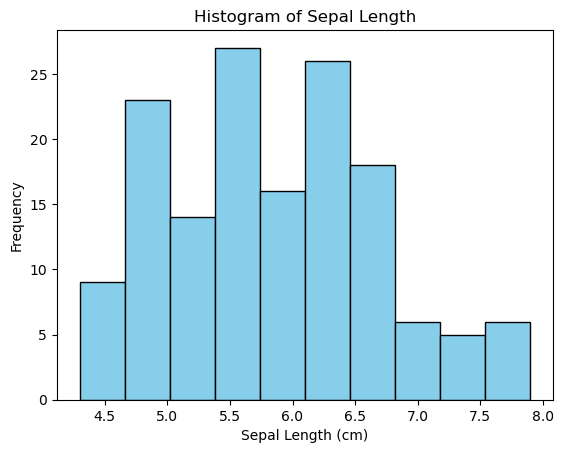

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['sepal length (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

In [18]:
nums = [2, 5, 7, 8, 9, 12, 14, 18, 21, 23, 26, 28, 30, 33, 37]
mean_val = np.mean(nums)
median_val = np.median(nums)
mean_val, median_val

(np.float64(18.2), np.float64(18.0))

In [20]:
def summarize(values):
    summary = {
        'count': len(values),
        'mean': np.mean(values),
        'min': np.min(values),
        'max': np.max(values),
        'std_dev': np.std(values)
    }
    return summary

summarize(nums)

{'count': 15,
 'mean': np.float64(18.2),
 'min': np.int64(2),
 'max': np.int64(37),
 'std_dev': np.float64(10.665833300778706)}

In [21]:
matrix = np.random.randint(1, 51, size=(6, 6))
matrix

array([[31, 28, 37, 43, 39, 29],
       [27, 48, 18, 15, 15, 21],
       [27, 14,  2, 16, 43, 23],
       [44, 46, 12, 10, 46, 16],
       [12, 41,  8, 46, 33, 33],
       [19,  8, 43, 30, 50,  5]], dtype=int32)

In [24]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target

print(df.head())

print(df.info())
print(df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([-0.10753506, -0.05844926,  0.2647557 ,  0.52929416]),
 np.float64(0.18080804062267852))

In [28]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['sepal length (cm)']])
scaled[:10]

array([[0.22222222],
       [0.16666667],
       [0.11111111],
       [0.08333333],
       [0.19444444],
       [0.30555556],
       [0.08333333],
       [0.19444444],
       [0.02777778],
       [0.16666667]])

In [30]:
df.groupby('target')['sepal length (cm)'].mean()

target
0    5.006
1    5.936
2    6.588
Name: sepal length (cm), dtype: float64

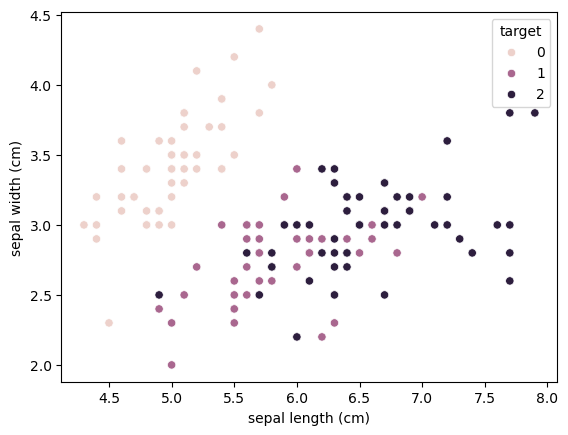

In [32]:
import seaborn as sns

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)
plt.show()

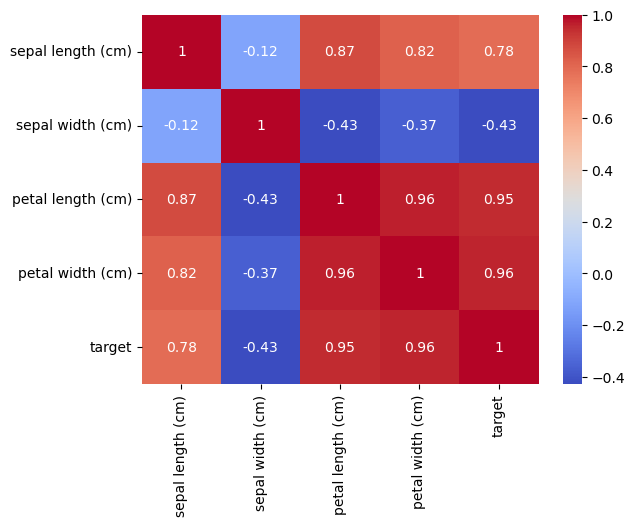

In [34]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [36]:
df.to_csv('cleaned_dataset.csv', index=False)